In [2]:
import pandas as pd
#pd.set_option('display.max_rows', None)
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import path
import os
import cartopy.crs as ccrs
import cartopy
import numpy as np
import netCDF4 as nc
np.set_printoptions(threshold=100000)
from shapely.geometry import Polygon, Point, MultiPoint
from shapely.ops import cascaded_union
from datetime import datetime, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
#fnction is from here: https://gis.stackexchange.com/questions/71630/subsetting-a-curvilinear-netcdf-file-roms-model-output-using-a-lon-lat-boundin
#used as i0, i1, j0, j1 =  bbox2ij(lon, lat, [w, e, s, n])

def bbox2ij(lon,lat,bbox):
    bbox=np.array(bbox)
    mypath=np.array([bbox[[0,1,1,0]],bbox[[2,2,3,3]]]).T
    p = path.Path(mypath)
    points = np.vstack((lon.flatten(),lat.flatten())).T
    n,m = np.shape(lon)
    inside = p.contains_points(points).reshape((n,m))
    ii,jj = np.meshgrid(range(m),range(n)) #ii is the columns, jj is the rows
    return min(ii[inside]),max(ii[inside]),min(jj[inside]),max(jj[inside])

In [20]:
#hrrr = nc.Dataset('hrrr_20190727_t13z.wrfsfc.00.nc')
hrrr = nc.Dataset('hrrr.t2019080200z.wrfsfc.nc')
print(hrrr.variables)

lon = hrrr['gridlon_0'][:,:]
lat = hrrr['gridlat_0'][:,:]
i0, i1, j0, j1 =  bbox2ij(lon, lat, [-125, -101, 31, 49])
print(i0, i1, j0, j1)

{'TMP_P0_L1_GLC0': <class 'netCDF4._netCDF4.Variable'>
float32 TMP_P0_L1_GLC0(ygrid_0, xgrid_0)
    initial_time: 08/02/2019 (00:00)
    forecast_time_units: hours
    forecast_time: 0
    level: 0.0
    level_type: Ground or water surface
    parameter_template_discipline_category_number: [0 0 0 0]
    parameter_discipline_and_category: Meteorological products, Temperature
    grid_type: Lambert Conformal can be secant or tangent, conical or bipolar
    coordinates: gridlat_0 gridlon_0
    _FillValue: 1e+20
    units: K
    long_name: Temperature
    production_status: Operational products
    center: US National Weather Service - NCEP (WMC)
unlimited dimensions: 
current shape = (1059, 1799)
filling on, 'TMP_P0_L100_GLC0': <class 'netCDF4._netCDF4.Variable'>
float32 TMP_P0_L100_GLC0(lv_ISBL0, ygrid_0, xgrid_0)
    initial_time: 08/02/2019 (00:00)
    forecast_time_units: hours
    forecast_time: 0
    level_type: Isobaric surface (Pa)
    parameter_template_discipline_category_number

32 812 253 1021


In [21]:
lat = lat[j0:j1, i0:i1]
lon = lon[j0:j1, i0:i1]
T = hrrr['TMP_P0_L1_GLC0'][j0:j1, i0:i1]
print(lat.shape, lon.shape, T.shape)

(768, 780) (768, 780) (768, 780)


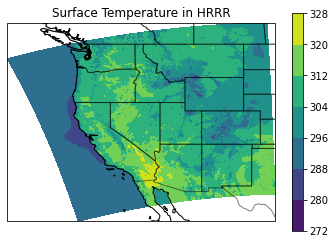

In [22]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([lon[0]-10, lon[len(lon)-1]+10, lat[0]-5, lat[len(lat)-1]+5])
ax.add_feature(cartopy.feature.STATES, linestyle='-', alpha=.5)

plt.contourf(lon, lat, T)
plt.colorbar()
plt.title('Surface Temperature in HRRR')
plt.show()

In [63]:
hgt = hrrr['lv_HTGL2'][:]
print(hgt)
uwind = hrrr['UGRD_P0_L103_GLC0'][0,j0:j1, i0:i1]
vwind = hrrr['VGRD_P0_L103_GLC0'][0,j0:j1, i0:i1]
print(uwind.shape, vwind.shape)

g = np.gradient(uwind)[1]+np.gradient(vwind)[1] # equivalent to our func
print(g.shape)

[10. 80.]
(768, 780) (768, 780)
(768, 780)


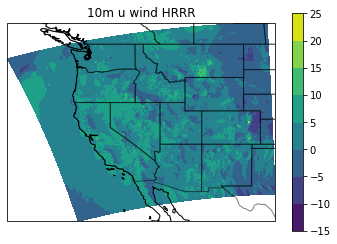

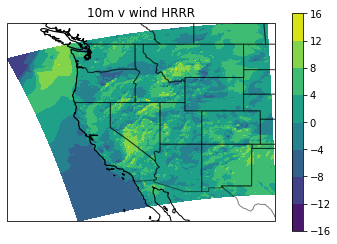

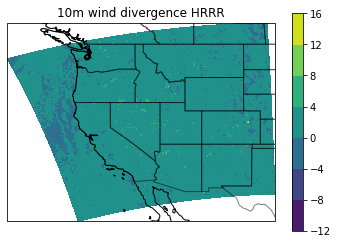

In [65]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.STATES, linestyle='-', alpha=.5)
plt.contourf(lon, lat, uwind)
plt.colorbar()
plt.title('10m u wind HRRR')
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.STATES, linestyle='-', alpha=.5)
plt.contourf(lon, lat, vwind)
plt.colorbar()
plt.title('10m v wind HRRR')
plt.show()


ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.STATES, linestyle='-', alpha=.5)
plt.contourf(lon, lat, g)
plt.colorbar()
plt.title('10m wind divergence HRRR')
plt.show()